In [412]:
import numpy as np
import time
import sys
import math
sys.path
sys.path.insert(0, 'C:/Users/Oleg/Google Диск/QC/Codes/QC-qiskit-codes/Shor')
sys.path.insert(0, 'C:/Users/Oleg/Google Диск/QC/Codes/QC-qiskit-codes/Library')
sys.path.insert(0, 'C:/Users/Oleg/Google Диск/QC/Codes/QC-qiskit-codes')

import qiskit
from qiskit import QuantumRegister as Q_R
from qiskit import ClassicalRegister as C_R
from qiskit_aer import Aer
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
from qiskit.providers.basic_provider import BasicSimulator

from qiskit.qasm2 import dumps

In [413]:
def remove_q(qc, q_num_init, q_num_fin, list_1):
    from qiskit.qasm2 import dumps
    qasm_str = dumps(qc)
    #print(qasm_str)

    for i in range(q_num_fin):
        str_in = 'q[' + str(list_1[i]) + ']'
        str_out = 'q[' + str(i) + ']'
        qasm_str = qasm_str.replace(str_in,str_out)
    
    str_in = 'qreg q[' + str(q_num_init) + ']'
    str_out = 'qreg q[' + str(q_num_fin) + ']'
    qasm_str = qasm_str.replace(str_in,str_out)
    str_in = 'creg c[' + str(q_num_init) + ']'
    str_out = 'creg c[' + str(q_num_fin) + ']'
    qasm_str = qasm_str.replace(str_in,str_out)
    
    str_sx = '\ngate sx q1 {U(1.57079632679, 0, 0) q1;}\n\n'
    index = qasm_str.find('qreg q[' + str(q_num_fin) + ']')
    qasm_str = qasm_str[:index] + str_sx + qasm_str[index:]
    
    #print(qasm_str)
    qc_2= QuantumCircuit(1,1)
    qc_2 = qiskit.qasm2.loads(qasm_str)
    return qc_2

In [414]:
import qiskit.qasm2
 
q = qiskit.qasm2.load("circuit_3_60q.qasm")

In [415]:
total_numer_of_gates = 12241

In [416]:
#q.draw('mpl')

In [417]:
cut_start = 19
cut_number = 6

qc_cut = QuantumCircuit(60,60)
for q_i in range(cut_start, cut_start + cut_number):
    qc_cut.append(q.data[q_i], qc_cut.qubits, qc_cut.clbits)

#qc_cut.draw('mpl')

In [418]:
# find all cz
counter = 0
cz_list = []
for i in range(total_numer_of_gates):
    if q.data[i][0]._name == 'cz':
        cz_list.append(i)
        counter = counter + 1
        
number_of_cz = counter
number_of_cz

862

In [419]:
cz_list_q[0]

105

In [420]:
Threshold = 6000
rem_blocks_tot = 0
delet_gates = []
for q_num in range(60):
    # find all cz for a single qubit
    counter = 0
    cz_list_q = []
    for i in range(total_numer_of_gates):
        if q.data[i][0]._name == 'cz':
            if q.data[i][1][0]._index == q_num or q.data[i][1][1]._index == q_num:
                cz_list_q.append(i)
                counter = counter + 1
            
    number_of_cz = counter
    number_of_cz
    rem_blocks = 0


    qc_cut = QuantumCircuit(60,60)
    qbit_counter = 0
    for q_i in range(0, cz_list_q[0]):
        if q.data[q_i][1][0]._index == q_num:
            qc_cut.append(q.data[q_i], qc_cut.qubits, qc_cut.clbits)
            qbit_counter = qbit_counter + 1
    #qasm_str = dumps(qc_cut)
    #print(qasm_str)
    
    q_cut_1 = remove_q(qc_cut, 60, 1, [q_num])
    q_cut_1.measure(0,0)
    #q_cut_1.draw('mpl')
    q_cut_1 = qiskit.transpile(q_cut_1, simulator_object)
    job = simulator_object.run(q_cut_1, shots = 10000)
    results = job.result()
    counts = results.get_counts()
    ccc = 0
    ans = []
    ans_count = []
    for dic in counts:
        if counts[dic] > Threshold:
            ans.append(dic)
            ans_count.append(counts[dic])
            ccc = ccc + 1
    #print('block '+ str(chek_block) +' qbit '+str(qq[0])+'. State: ' + str(ans) + ', counts: ' + str(ans_count))
    if ans == []:
        aa = 1
    else:
        if ans[0] == '0':
            zero_bits[0] = 1
            #print('block for bit ' + str(0) + ' can be removed')
            rem_blocks = rem_blocks + 1
            for q_i in range(0, cz_list_q[0]):
                if q.data[q_i][1][0]._index == q_num:
                    delet_gates.append(q_i)
            #delet_gates.append(cz_list_q[0])
    
    for chek_block in range(len(cz_list_q)-1):
        qc_cut = QuantumCircuit(60,60)
        qbit_counter = 0
        for q_i in range(cz_list_q[chek_block] + 1, cz_list_q[chek_block+1]):
            if q.data[q_i][1][0]._index == q_num:
                qc_cut.append(q.data[q_i], qc_cut.qubits, qc_cut.clbits)
                qbit_counter = qbit_counter + 1
        #qasm_str = dumps(qc_cut)
        #print(qasm_str)
        
        q_cut_1 = remove_q(qc_cut, 60, 1, [q_num])
        q_cut_1.measure(0,0)
        #q_cut_1.draw('mpl')
        q_cut_1 = qiskit.transpile(q_cut_1, simulator_object)
        job = simulator_object.run(q_cut_1, shots = 10000)
        results = job.result()
        counts = results.get_counts()
        ccc = 0
        ans = []
        ans_count = []
        for dic in counts:
            if counts[dic] > Threshold:
                ans.append(dic)
                ans_count.append(counts[dic])
                ccc = ccc + 1
        #print('block '+ str(chek_block) +' qbit '+str(qq[0])+'. State: ' + str(ans) + ', counts: ' + str(ans_count))
        if ans == []:
            aa = 1
        else:
            if ans[0] == '0':
                zero_bits[0] = 1
                #print('block for bit ' + str(0) + ' can be removed')
                rem_blocks = rem_blocks + 1
                for q_i in range(cz_list_q[chek_block] + 1, cz_list_q[chek_block+1]):
                    if q.data[q_i][1][0]._index == q_num:
                        delet_gates.append(q_i)
                #delet_gates.append(cz_list_q[chek_block+1])
                       
            
    print('qubit ' + str(q_num)+':'+ str(rem_blocks))
    rem_blocks_tot = rem_blocks_tot + rem_blocks
print(len(delet_gates))

qubit 0:18
qubit 1:17
qubit 2:16
qubit 3:14
qubit 4:21
qubit 5:18
qubit 6:19
qubit 7:23
qubit 8:16
qubit 9:15
qubit 10:22
qubit 11:14
qubit 12:14
qubit 13:17
qubit 14:14
qubit 15:9
qubit 16:16
qubit 17:15
qubit 18:11
qubit 19:27
qubit 20:12
qubit 21:26
qubit 22:19
qubit 23:12
qubit 24:18
qubit 25:13
qubit 26:13
qubit 27:12
qubit 28:12
qubit 29:16
qubit 30:30
qubit 31:11
qubit 32:12
qubit 33:15
qubit 34:17
qubit 35:18
qubit 36:11
qubit 37:21
qubit 38:13
qubit 39:22
qubit 40:14
qubit 41:15
qubit 42:12
qubit 43:12
qubit 44:14
qubit 45:16
qubit 46:18
qubit 47:23
qubit 48:10
qubit 49:15
qubit 50:15
qubit 51:8
qubit 52:22
qubit 53:12
qubit 54:16
qubit 55:19
qubit 56:14
qubit 57:19
qubit 58:9
qubit 59:17
6175


In [421]:
print(len(set(delet_gates)))

6175


In [422]:
qc_red_1 = QuantumCircuit(60,60)
for i in range(total_numer_of_gates):
    if i not in delet_gates:
        qc_red_1.append(q.data[i], qc_red_1.qubits, qc_red_1.clbits)


In [423]:
cut_start = 0
cut_number = 2000

qc_cut_1 = QuantumCircuit(60,60)
for q_i in range(cut_start, cut_start + cut_number):
    qc_cut_1.append(qc_red_1.data[q_i], qc_cut_1.qubits, qc_cut_1.clbits)

#qc_cut_1.draw('mpl')

In [424]:
from qiskit.qasm2 import dumps
qasm_str = dumps(qc_red_1)

str_sx = '\ngate sx q1 {U(1.57079632679, 0, 0) q1;}\n\n'
index = qasm_str.find('qreg q[' + str(60) + ']')
qasm_str = qasm_str[:index] + str_sx + qasm_str[index:]

f = open("qc_red_6000.qasm", "a")
f.write(qasm_str)
f.close()

In [425]:
# find all cz for a single qubit
q_num = 5
counter = 0
cz_list_q = []
for i in range(len(qc_red_1.data)):
    counter_loc = 0
    if qc_red_1.data[i][0]._name == 'cz':
        if qc_red_1.data[i][1][0]._index == q_num or qc_red_1.data[i][1][1]._index == q_num:
            cz_list_q.append(i)
            counter = counter + 1
        
number_of_cz = counter
number_of_cz
rem_blocks = 0
print(number_of_cz)
print(cz_list_q)

38
[90, 576, 885, 978, 1026, 1042, 1049, 1056, 1057, 1063, 1082, 1258, 1322, 1358, 1372, 1379, 1398, 1416, 1422, 1430, 1803, 2095, 2371, 2859, 3198, 3461, 3873, 4135, 4393, 4844, 4916, 4929, 4937, 4958, 5042, 5255, 5683, 5962]


In [426]:
q_count = []
for ii in range(len(cz_list_q)-1):
    q1 = qc_red_1.data[cz_list_q[ii+1]][1][0]._index
    q2 = qc_red_1.data[cz_list_q[ii+1]][1][1]._index
    q_count_loc = 0
    ch_int = ii
    for q_i in range(cz_list_q[ch_int]+1, cz_list_q[ch_int+1]):
            if q.data[q_i][1][0]._index == q_num:
                q_count_loc = q_count_loc + 1
    q_count.append(q_count_loc)
    
delete_cz = []
for ii in range(len(cz_list_q)-3):
    delete_cz.append(0)
for ii in range(len(cz_list_q)-3):
    
    q1_1 = qc_red_1.data[cz_list_q[ii]][1][0]._index
    q1_2 = qc_red_1.data[cz_list_q[ii]][1][1]._index
    q2_1 = qc_red_1.data[cz_list_q[ii+1]][1][0]._index
    q2_2 = qc_red_1.data[cz_list_q[ii+1]][1][1]._index
    q3_1 = qc_red_1.data[cz_list_q[ii+2]][1][0]._index
    q3_2 = qc_red_1.data[cz_list_q[ii+2]][1][1]._index
    if q1_1 == q2_1 and q1_2 == q2_2 and q_count[ii] == 0:
        delete_cz[ii] = 1
        delete_cz[ii+1] = 1
    print('q1: ' + str(q1_1) + ', q2: '+str (q1_2) + ', qubits: ' + str(q_count[ii]) + ', delete ' +str(delete_cz[ii]))

q1: 8, q2: 5, qubits: 6, delete 0
q1: 5, q2: 13, qubits: 6, delete 0
q1: 8, q2: 5, qubits: 0, delete 0
q1: 4, q2: 5, qubits: 0, delete 0
q1: 37, q2: 5, qubits: 0, delete 0
q1: 4, q2: 5, qubits: 0, delete 0
q1: 52, q2: 5, qubits: 0, delete 0
q1: 37, q2: 5, qubits: 0, delete 0
q1: 52, q2: 5, qubits: 0, delete 0
q1: 37, q2: 5, qubits: 0, delete 1
q1: 37, q2: 5, qubits: 1, delete 1
q1: 5, q2: 13, qubits: 0, delete 0
q1: 3, q2: 5, qubits: 0, delete 0
q1: 19, q2: 5, qubits: 0, delete 1
q1: 19, q2: 5, qubits: 0, delete 1
q1: 3, q2: 5, qubits: 0, delete 0
q1: 19, q2: 5, qubits: 0, delete 1
q1: 19, q2: 5, qubits: 0, delete 1
q1: 3, q2: 5, qubits: 0, delete 1
q1: 3, q2: 5, qubits: 6, delete 1
q1: 8, q2: 5, qubits: 52, delete 0
q1: 5, q2: 13, qubits: 7, delete 0
q1: 8, q2: 5, qubits: 59, delete 0
q1: 5, q2: 13, qubits: 5, delete 0
q1: 8, q2: 5, qubits: 1, delete 0
q1: 5, q2: 13, qubits: 7, delete 0
q1: 8, q2: 5, qubits: 0, delete 0
q1: 5, q2: 13, qubits: 6, delete 0
q1: 8, q2: 5, qubits: 0, delet

In [427]:
gate_nymber_del = []
for q_num in range(0,60):
    counter = 0
    cz_list_q = []
    for i in range(len(qc_red_1.data)):
        counter_loc = 0
        if qc_red_1.data[i][0]._name == 'cz':
            if qc_red_1.data[i][1][0]._index == q_num or qc_red_1.data[i][1][1]._index == q_num:
                cz_list_q.append(i)
                counter = counter + 1
            
    number_of_cz = counter
    number_of_cz
    rem_blocks = 0
    #print(number_of_cz)
    #print(cz_list_q)
    
    q_count = []
    for ii in range(len(cz_list_q)-1):
        q1 = qc_red_1.data[cz_list_q[ii+1]][1][0]._index
        q2 = qc_red_1.data[cz_list_q[ii+1]][1][1]._index
        q_count_loc = 0
        ch_int = ii
        for q_i in range(cz_list_q[ch_int]+1, cz_list_q[ch_int+1]):
                if q.data[q_i][1][0]._index == q_num:
                    q_count_loc = q_count_loc + 1
        q_count.append(q_count_loc)
        
    delete_cz = []
    for ii in range(len(cz_list_q)):
        delete_cz.append(0)
    for ii in range(len(cz_list_q)-3):
        
        q1_1 = qc_red_1.data[cz_list_q[ii]][1][0]._index
        q1_2 = qc_red_1.data[cz_list_q[ii]][1][1]._index
        q2_1 = qc_red_1.data[cz_list_q[ii+1]][1][0]._index
        q2_2 = qc_red_1.data[cz_list_q[ii+1]][1][1]._index
        q3_1 = qc_red_1.data[cz_list_q[ii+2]][1][0]._index
        q3_2 = qc_red_1.data[cz_list_q[ii+2]][1][1]._index
        if q1_1 == q2_1 and q1_2 == q2_2 and q_count[ii] == 0:
            delete_cz[ii] = 1
            delete_cz[ii+1] = 1
            gate_nymber_del.append(cz_list_q[ii])
            gate_nymber_del.append(cz_list_q[ii+1])
        #print('q1: ' + str(q1_1) + ', q2: '+str (q1_2) + ', qubits: ' + str(q_count[ii]) + ', delete ' +str(delete_cz[ii]))
len(gate_nymber_del)

396

In [428]:
qc_red_2 = QuantumCircuit(60,60)
for i in range(len(qc_red_1.data)):
    if i not in gate_nymber_del:
        qc_red_2.append(qc_red_1.data[i], qc_red_2.qubits, qc_red_2.clbits)

In [429]:
len(qc_red_2.data)

5838

In [430]:
gate_nymber_del = []
for q_num in range(0,60):
    counter = 0
    cz_list_q = []
    for i in range(len(qc_red_2.data)):
        counter_loc = 0
        if qc_red_2.data[i][0]._name == 'cz':
            if qc_red_2.data[i][1][0]._index == q_num or qc_red_2.data[i][1][1]._index == q_num:
                cz_list_q.append(i)
                counter = counter + 1
            
    number_of_cz = counter
    number_of_cz
    rem_blocks = 0
    #print(number_of_cz)
    #print(cz_list_q)
    
    q_count = []
    for ii in range(len(cz_list_q)-1):
        q1 = qc_red_2.data[cz_list_q[ii+1]][1][0]._index
        q2 = qc_red_2.data[cz_list_q[ii+1]][1][1]._index
        q_count_loc = 0
        ch_int = ii
        for q_i in range(cz_list_q[ch_int]+1, cz_list_q[ch_int+1]):
                if q.data[q_i][1][0]._index == q_num:
                    q_count_loc = q_count_loc + 1
        q_count.append(q_count_loc)
        
    delete_cz = []
    for ii in range(len(cz_list_q)):
        delete_cz.append(0)
    for ii in range(len(cz_list_q)-3):
        
        q1_1 = qc_red_2.data[cz_list_q[ii]][1][0]._index
        q1_2 = qc_red_2.data[cz_list_q[ii]][1][1]._index
        q2_1 = qc_red_2.data[cz_list_q[ii+1]][1][0]._index
        q2_2 = qc_red_2.data[cz_list_q[ii+1]][1][1]._index
        q3_1 = qc_red_2.data[cz_list_q[ii+2]][1][0]._index
        q3_2 = qc_red_2.data[cz_list_q[ii+2]][1][1]._index
        if q1_1 == q2_1 and q1_2 == q2_2 and q_count[ii] == 0:
            delete_cz[ii] = 1
            delete_cz[ii+1] = 1
            gate_nymber_del.append(cz_list_q[ii])
            gate_nymber_del.append(cz_list_q[ii+1])
        #print('q1: ' + str(q1_1) + ', q2: '+str (q1_2) + ', qubits: ' + str(q_count[ii]) + ', delete ' +str(delete_cz[ii]))
len(gate_nymber_del)

80

In [431]:
qc_red_3 = QuantumCircuit(60,60)
for i in range(len(qc_red_2.data)):
    if i not in gate_nymber_del:
        qc_red_3.append(qc_red_2.data[i], qc_red_3.qubits, qc_red_3.clbits)

In [432]:
from qiskit.qasm2 import dumps
qasm_str = dumps(qc_red_3)

str_sx = '\ngate sx q1 {U(1.57079632679, 0, 0) q1;}\n\n'
index = qasm_str.find('qreg q[' + str(60) + ']')
qasm_str = qasm_str[:index] + str_sx + qasm_str[index:]

f = open("qc_red_6000_2.qasm", "a")
f.write(qasm_str)
f.close()

In [433]:
cut_start = 0
cut_number = 2000

qc_cut_1 = QuantumCircuit(60,60)
for q_i in range(cut_start, cut_start + cut_number):
    qc_cut_1.append(qc_red_3.data[q_i], qc_cut_1.qubits, qc_cut_1.clbits)

#qc_cut_1.draw('mpl')

In [444]:
qqq=QuantumCircuit(60,60)
list_2 = [13, 39, 20]
for i in range(len(qc_red_3.data)):
    if qc_red_3.data[i][0]._name != 'measure':
        if qc_red_3.data[i][0]._name == 'cz':     
            if qc_red_3.data[i][1][0]._index in list_2 and qc_red_3.data[i][1][1]._index in list_2:
                qqq.append(qc_red_3.data[i],qqq.qubits,qqq.clbits)
        else:
            if qc_red_3.data[i][1][0]._index in list_2:
                qqq.append(qc_red_3.data[i],qqq.qubits,qqq.clbits)

q_cut_1=QuantumCircuit(3,3)
q_cut_1 = remove_q(qqq, 60, 3, list_2)
q_cut_1.measure(0,0)
q_cut_1.measure(1,1)
q_cut_1.measure(2,2)
#q_cut_1.draw('mpl')


In [445]:
import bluequbit
from qiskit.visualization import plot_histogram
bq = bluequbit.init("ifvQUoJTa445RywgR6thzt5D2dCtAezL")
result = bq.run(q_cut_1, device='cpu')
counts = result.get_counts()

BQ-PYTHON-SDK - WARNING - Beta version 0.8.3b1 of BlueQubit Python SDK is being used.
BQ-PYTHON-SDK - INFO - Submitted: Job ID: VIvyYdhL2McuMtCT, device: cpu, run status: COMPLETED, created on: 2024-10-27 02:51:43 UTC, cost: $0.00, run time: 18 ms, queue time: 21 ms, num qubits: 3


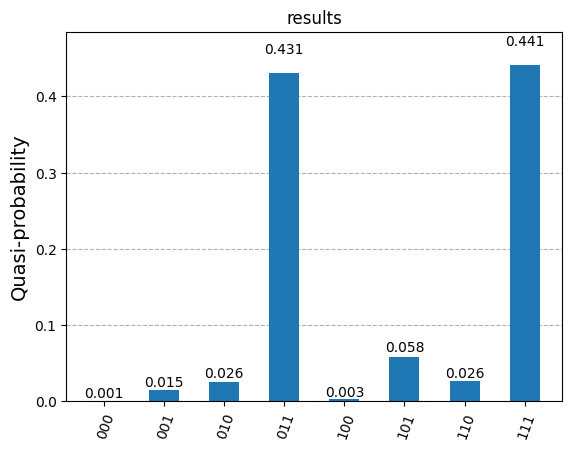

In [446]:
from qiskit.visualization import plot_histogram
plot_histogram(counts, title = 'results')

In [437]:
gate_nymber_del = []
for q_num in range(0,60):
    print('q ' + str(q_num))
    counter = 0
    cz_list_q = []
    for i in range(len(qc_red_3.data)):
        counter_loc = 0
        if qc_red_3.data[i][0]._name == 'cz':
            if qc_red_3.data[i][1][0]._index == q_num or qc_red_3.data[i][1][1]._index == q_num:
                cz_list_q.append(i)
                counter = counter + 1
            
    number_of_cz = counter
    number_of_cz
    rem_blocks = 0
    #print(number_of_cz)
    #print(cz_list_q)
    
    q_count = []
    for ii in range(len(cz_list_q)-1):
        q1 = qc_red_3.data[cz_list_q[ii+1]][1][0]._index
        q2 = qc_red_3.data[cz_list_q[ii+1]][1][1]._index
        q_count_loc = 0
        ch_int = ii
        for q_i in range(cz_list_q[ch_int]+1, cz_list_q[ch_int+1]):
                if q.data[q_i][1][0]._index == q_num:
                    q_count_loc = q_count_loc + 1
        q_count.append(q_count_loc)
        
    delete_cz = []
    for ii in range(len(cz_list_q)):
        delete_cz.append(0)
    for ii in range(len(cz_list_q)-3):
        q1_1 = qc_red_3.data[cz_list_q[ii]][1][0]._index
        q1_2 = qc_red_3.data[cz_list_q[ii]][1][1]._index
        q2_1 = qc_red_3.data[cz_list_q[ii+1]][1][0]._index
        q2_2 = qc_red_3.data[cz_list_q[ii+1]][1][1]._index
        q3_1 = qc_red_3.data[cz_list_q[ii+2]][1][0]._index
        q3_2 = qc_red_3.data[cz_list_q[ii+2]][1][1]._index
        print('q1: ' + str(q1_1) + ', q2: '+str (q1_2) + ', qubits: ' + str(q_count[ii]) + ', delete ' +str(delete_cz[ii]))
#len(gate_nymber_del)

q 0
q1: 25, q2: 0, qubits: 6, delete 0
q1: 0, q2: 50, qubits: 0, delete 0
q1: 25, q2: 0, qubits: 7, delete 0
q1: 0, q2: 50, qubits: 12, delete 0
q1: 25, q2: 0, qubits: 0, delete 0
q1: 0, q2: 50, qubits: 7, delete 0
q1: 25, q2: 0, qubits: 0, delete 0
q1: 0, q2: 50, qubits: 6, delete 0
q1: 25, q2: 0, qubits: 0, delete 0
q1: 0, q2: 50, qubits: 7, delete 0
q1: 25, q2: 0, qubits: 0, delete 0
q1: 0, q2: 50, qubits: 0, delete 0
q1: 25, q2: 0, qubits: 6, delete 0
q1: 0, q2: 50, qubits: 0, delete 0
q1: 25, q2: 0, qubits: 7, delete 0
q 1
q1: 19, q2: 1, qubits: 0, delete 0
q1: 1, q2: 24, qubits: 6, delete 0
q1: 19, q2: 1, qubits: 7, delete 0
q1: 1, q2: 24, qubits: 6, delete 0
q1: 19, q2: 1, qubits: 0, delete 0
q1: 1, q2: 24, qubits: 6, delete 0
q1: 19, q2: 1, qubits: 1, delete 0
q1: 1, q2: 24, qubits: 36, delete 0
q1: 19, q2: 1, qubits: 13, delete 0
q1: 1, q2: 24, qubits: 0, delete 0
q1: 19, q2: 1, qubits: 7, delete 0
q1: 1, q2: 24, qubits: 1, delete 0
q1: 19, q2: 1, qubits: 0, delete 0
q1: 1, q2

In [328]:
V = 60
adj = [[] for i in range(V+1)]
for gate in qc_red_3.data:
     #print('\ngate name:', gate[0].name)
     bb = gate[1]
     #print('qubit(s) acted on:', bb[0]._index)
     if len(bb) > 1:
        #print('qubit(s) acted on:', bb[1]._index)
        addEdge(bb[0]._index, bb[1]._index)

#for i in range(42):
#    addEdge(i, i)

list_of_conn = []
#for q_n in range(0,1):
q_n = 1
for u in range(q_n,q_n+1):
    for v in range(60):
        if u != v:
            if (isReachable(u, v)):
                print("There is a path from",u,"to",v)
                list_of_conn.append(u)
                list_of_conn.append(v)
            else:
                aa = 1
                print("There is no path from",u,"to",v)
list_of_conn = list(set(list_of_conn))
print(list_of_conn)
print(len(list_of_conn))

There is a path from 1 to 0
There is a path from 1 to 2
There is a path from 1 to 3
There is a path from 1 to 4
There is a path from 1 to 5
There is a path from 1 to 6
There is a path from 1 to 7
There is a path from 1 to 8
There is a path from 1 to 9
There is a path from 1 to 10
There is a path from 1 to 11
There is a path from 1 to 12
There is a path from 1 to 13
There is a path from 1 to 14
There is a path from 1 to 15
There is a path from 1 to 16
There is a path from 1 to 17
There is a path from 1 to 18
There is a path from 1 to 19
There is a path from 1 to 20
There is a path from 1 to 21
There is a path from 1 to 22
There is a path from 1 to 23
There is a path from 1 to 24
There is a path from 1 to 25
There is a path from 1 to 26
There is a path from 1 to 27
There is a path from 1 to 28
There is a path from 1 to 29
There is a path from 1 to 30
There is a path from 1 to 31
There is a path from 1 to 32
There is a path from 1 to 33
There is a path from 1 to 34
There is a path from 1 

In [200]:
q_0 = QuantumCircuit(60,60)
for i in range(len(qc_red_1.data)):
    if qc_red_1.data[i][1][0]._index == q_num and qc_red_1.data[i][0]._name != 'cz' and qc_red_1.data[i][0]._name != 'measure':
         q_0.append(qc_red_1.data[i], q_0.qubits, q_0.clbits)
#q_0.draw('mpl')
#qasm_str = dumps(q_0)
#print(qasm_str)
q_cut_1 = QuantumCircuit(1,1)
q_cut_1 = remove_q(q_0, 60, 1, [q_num])


#q_cut_1.draw('mpl')

In [201]:
import bluequbit
from qiskit.visualization import plot_histogram
bq = bluequbit.init("ifvQUoJTa445RywgR6thzt5D2dCtAezL")
result = bq.run(q_cut_1, device='cpu')
counts = result.get_counts()

BQ-PYTHON-SDK - WARNING - Beta version 0.8.3b1 of BlueQubit Python SDK is being used.
BQ-PYTHON-SDK - INFO - Submitted: Job ID: 65yrhF3qqtrdS7ij, device: cpu, run status: COMPLETED, created on: 2024-10-27 01:13:39 UTC, cost: $0.00, run time: 9 ms, queue time: 19 ms, num qubits: 1


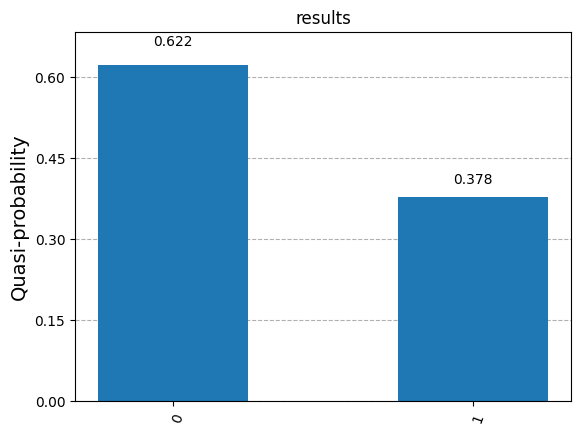

In [202]:

from qiskit.visualization import plot_histogram
plot_histogram(counts, title = 'results')

In [177]:
for dic in counts:
    if counts[dic] > 0.0001:
        ans = dic

print(ans)
print(counts[ans])

1
0.8029813170433044


In [65]:
#counting gates and finding the last gate nuber for a given qubit and finding the last 2-qubit gate
def gates_counting_func(qc, q_num):
    gate_count = 0
    gate_num = 0
    gate_position = []
    double_qubit_gates_number = []
    for gate in qc.data:
        gg = gate[0]
        bb = gate[1]
        if len(bb) < 2:
            q1 = bb[0]._index
            if q1 in q_num:
                gate_count = gate_count + 1
                gate_position.append(gate_num)
        else:
            q1 = bb[0]._index
            q2 = bb[1]._index
            if q1 in q_num or q2 in q_num:
                gate_count = gate_count + 1
                gate_position.append(gate_num)
                double_qubit_gates_number.append(gate_count - 1)
        gate_num = gate_num + 1

    print('Total number of gates: ' + str(gate_num))
    print('Number of gates with qubits in q_num: ' + str(gate_count))
    print('Gates positions: ' + str(gate_position))
    print('Positions of double gates : ' + str(double_qubit_gates_number))
    return gate_num, gate_count, gate_position, double_qubit_gates_number

In [60]:
#counting gates and finding the last gate nuber for a given qubit and finding the last 2-qubit gate
def gates_counting_func_1(qc, q_num):
    gate_count = 0
    gate_num = 0
    gate_position = []
    double_qubit_gates_number = []
    for gate in qc.data:
        gg = gate[0]
        bb = gate[1]
        if len(bb) < 2:
            q1 = bb[0]._index
            if q1 in q_num:
                gate_count = gate_count + 1
                gate_position.append(gate_num)
        else:
            q1 = bb[0]._index
            q2 = bb[1]._index
            if q1 in q_num or q2 in q_num:
                gate_count = gate_count + 1
                gate_position.append(gate_num)
                double_qubit_gates_number.append(gate_count - 1)
        gate_num = gate_num + 1
    return gate_num, gate_count, gate_position, double_qubit_gates_number

In [256]:
# Python3 program to check if there is exist a path between
# two vertices of an undirected graph.
from collections import deque
def addEdge(v, w):
    global adj
    adj[v].append(w)
    adj[w].append(v)
 
# A BFS based function to check whether d is reachable from s.
def isReachable(s, d):
     
    # Base case
    if (s == d):
        return True
 
    # Mark all the vertices as not visited
    visited = [False for i in range(V)]
 
    # Create a queue for BFS
    queue = deque()
 
    # Mark the current node as visited and enqueue it
    visited[s] = True
    queue.append(s)
 
    while (len(queue) > 0):
       
        # Dequeue a vertex from queue and print
        s = queue.popleft()
        # queue.pop_front()
 
        # Get all adjacent vertices of the dequeued vertex s
        # If a adjacent has not been visited, then mark it
        # visited  and enqueue it
        for i in adj[s]:
 
            # If this adjacent node is the destination node,
            # then return true
            if (i == d):
                return True
 
            # Else, continue to do BFS
            if (not visited[i]):
                visited[i] = True
                queue.append(i)
    # If BFS is complete without visiting d
    return False